In [1]:
#@title
import missingno as msno #library to help you visualise missing values
import pandas as pd #load data and perform data analytics
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns #plot data
import plotly.express as px #plot data

In [2]:
raw = pd.read_csv("Turbine_Data.csv")
new_df = raw

In [3]:
new_df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

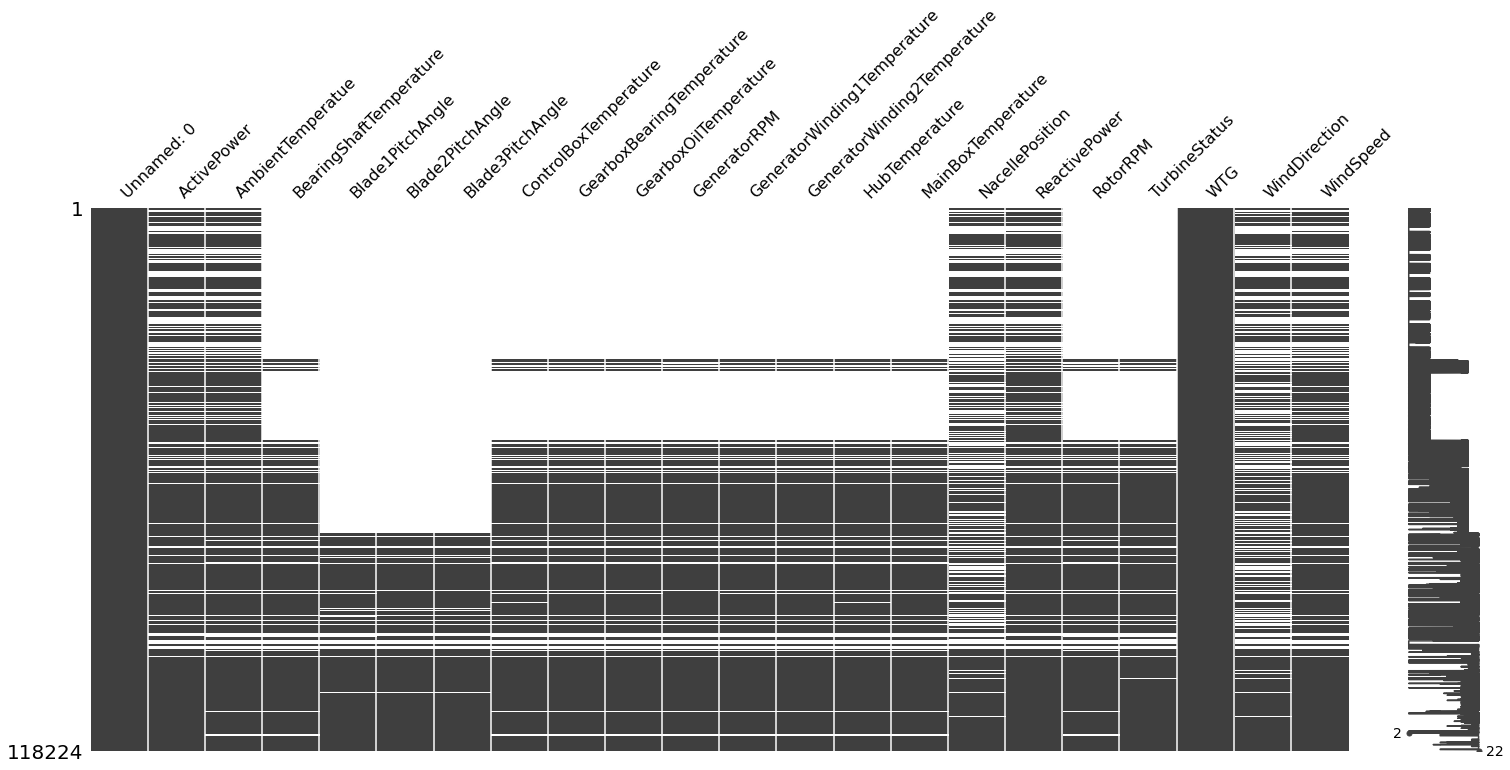

In [5]:
msno.matrix(new_df)

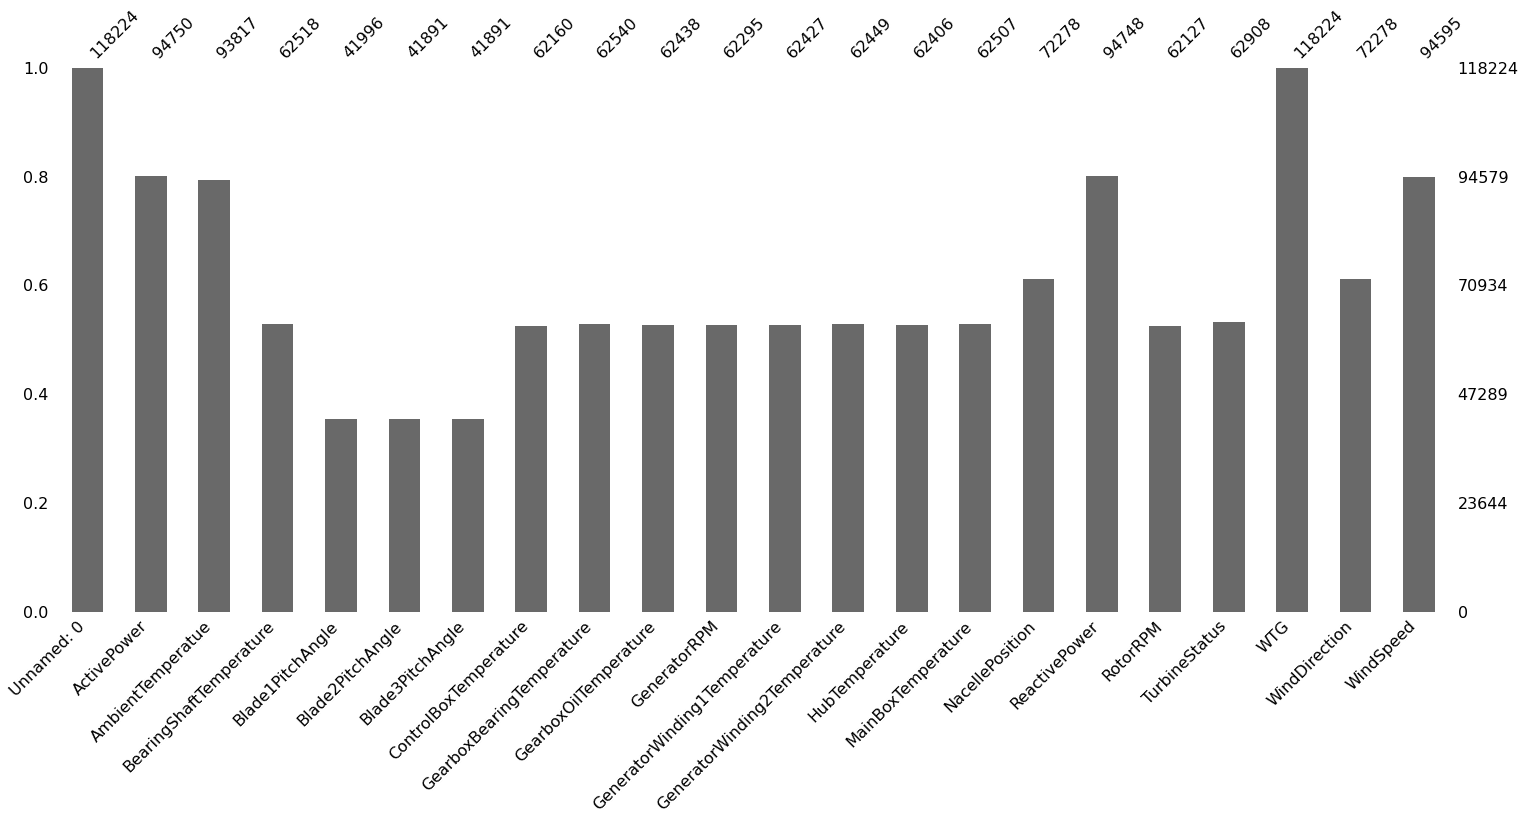

In [6]:
msno.bar(new_df)

In [7]:
#visualise and zoom in the missing periods of data
fig = px.line(new_df, x=new_df.index, y='ActivePower', title='Wind Turbine Data')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step='year', stepmode='backward'),
            dict(count=2, label="2y", step='year', stepmode='backward'),
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [8]:
#to check for missing values in a particular variable
new_df['ActivePower'].isna().sum()

23474

In [9]:
df_n = pd.Series([np.nan, 100, np.nan, 200, np.nan, 300, np.nan, 400, 450, 500, np.nan, 600, np.nan, np.nan, 750])
df_n = pd.DataFrame(df_n)

In [ ]:
msno.matrix(df_n)

In [ ]:
#fill forward
df_n['forward']=df_n.fillna(method='ffill', limit=1)
df_n

In [ ]:
#back forward
df_n['backward']=df_n[0].fillna(method='bfill', limit=1)
df_n

In [ ]:
#linear interpolation fill
df_n['linear interpolation'] = df_n[0].interpolate(method='linear', direction='forward', order=1)
df_n

In [ ]:
#rolling forward mean fill
df_n['rolling mean']=df_n[0].rolling(window=2, min_periods = 1).mean()
df_n

In [ ]:
msno.matrix(df_n)